**Theoretical**

Q.1 Can we use Bagging for regression problems?

Yes, Bagging can be used for regression. The BaggingRegressor in Scikit-Learn is an example of applying Bagging to regression, where multiple regressors are trained on different bootstrap samples, and the final prediction is the average of all models' outputs.

Q.2 What is the difference between multiple model training and single model training?

Single Model Training: A single algorithm is trained on the entire dataset.

Multiple Model Training (Ensemble Learning): Combines multiple models to improve accuracy, reduce variance, and prevent overfitting.

Q.3 Explain the concept of feature randomness in Random Forest.

Random Forest selects a random subset of features at each tree split instead of considering all features. This enhances diversity among trees and reduces overfitting.



Q.4 What is OOB (Out-of-Bag) Score?

The OOB score is an internal validation metric in Bagging-based models. Each model is trained on a bootstrap sample (random subset with replacement), and the unused (out-of-bag) data is used to evaluate the model’s accuracy.

Q.5 How can you measure the importance of features in a Random Forest model?

Feature importance is measured using:

Mean Decrease in Impurity (MDI): Importance based on how often a feature is used in splits.

Permutation Importance: Randomly shuffles a feature’s values and observes the drop in accuracy.

Q.6 Explain the working principle of a Bagging Classifier.

A Bagging Classifier trains multiple versions of the same base model on different bootstrap samples. Each model votes for a class, and the majority vote determines the final classification.

Q.7 How do you evaluate a Bagging Classifier’s performance?

Using metrics like:

Accuracy (for classification)

F1-score, Precision, Recall

Confusion Matrix

OOB Score

Q.8 How does a Bagging Regressor work?

Similar to a Bagging Classifier, a Bagging Regressor trains multiple regression models on different bootstrap samples. The final prediction is obtained by averaging the individual models' predictions.

Q.9 What is the main advantage of ensemble techniques?

They improve accuracy, reduce overfitting, and enhance robustness compared to a single model.

Q.10 What is the main challenge of ensemble methods?

Computationally expensive and harder to interpret than single models.

Q.11 Explain the key idea behind ensemble techniques.

Combining multiple models enhances prediction accuracy and reduces errors. The goal is to utilize the strengths of different models while minimizing their weaknesses.




Q.12 What is a Random Forest Classifier?

A Random Forest Classifier is an ensemble method that builds multiple Decision Trees and aggregates their outputs using majority voting (for classification) or averaging (for regression).

Q.13 What are the main types of ensemble techniques?

Bagging (Bootstrap Aggregating): Reduces variance by training multiple models on different samples.

Boosting: Focuses on correcting errors by training models sequentially.

Stacking: Combines different models by training a meta-learner.

Voting & Blending: Aggregates predictions from multiple models.

Q.14 What is ensemble learning in machine learning?

A technique that combines multiple models to improve predictive accuracy and robustness.

Q.15 When should we avoid using ensemble methods?

When computational resources are limited, interpretability is required, or when a single strong model already performs well.

Q.16 How does Bagging help in reducing overfitting?

By averaging predictions from multiple models, Bagging reduces variance, making models more generalizable.

Q.17 Why is Random Forest better than a single Decision Tree?

A single Decision Tree may overfit, while Random Forest averages multiple trees, reducing variance and improving accuracy.




Q.18 What is the role of bootstrap sampling in Bagging?

Bootstrap sampling generates different training subsets, ensuring model diversity and reducing overfitting.

Q>19 What are some real-world applications of ensemble techniques?

Fraud detection, healthcare diagnosis, recommendation systems, image classification, financial forecasting, etc.

Q.20 
Bagging is useful when a model is overfitting and needs variance reduction.

Boosting is better when the model has high bias and needs stronger learning power.



**practical**

In [2]:
#Q.1 
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")



Model Accuracy: 0.89


In [3]:
#Q.2 
# Import necessary libraries
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Regressor with Decision Trees
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)

# Train the model
bagging_reg.fit(X_train, y_train)

# Make predictions
y_pred = bagging_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 7287.41


In [4]:
#Q.3 
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_clf.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("Feature Importance Scores:\n")
print(feature_importance_df)


Feature Importance Scores:

                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fr

In [5]:
#Q.4 
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a single Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Initialize and train a Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) for both models
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print the results
print(f"Decision Tree Regressor MSE: {mse_dt:.2f}")
print(f"Random Forest Regressor MSE: {mse_rf:.2f}")


Decision Tree Regressor MSE: 20187.01
Random Forest Regressor MSE: 7029.98


In [6]:
#Q>5 
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier with OOB score enabled
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42, bootstrap=True)
rf_clf.fit(X_train, y_train)

# Print the Out-of-Bag (OOB) Score
print(f"OOB Score: {rf_clf.oob_score_:.4f}")


OOB Score: 0.9560


In [8]:
#Q.6 
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Classifier with SVM as the base estimator
bagging_clf = BaggingClassifier(estimator=SVC(), n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.2f}")


Bagging Classifier Accuracy: 0.85


Number of Trees: 1, Accuracy: 0.8450
Number of Trees: 5, Accuracy: 0.8550
Number of Trees: 10, Accuracy: 0.8550
Number of Trees: 20, Accuracy: 0.8750
Number of Trees: 50, Accuracy: 0.8800
Number of Trees: 100, Accuracy: 0.9000
Number of Trees: 200, Accuracy: 0.8950
Number of Trees: 500, Accuracy: 0.9000


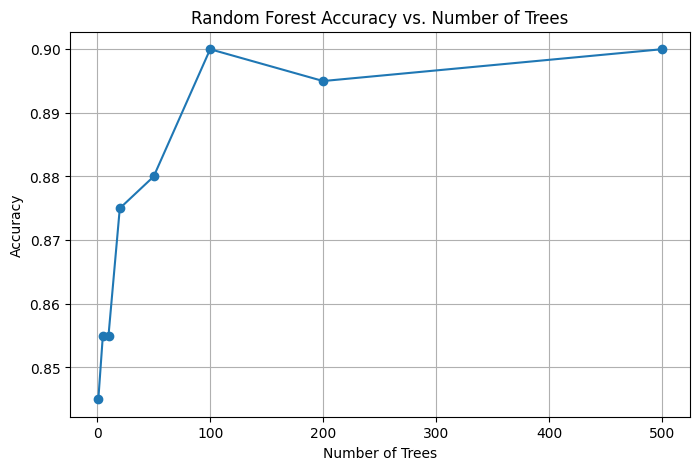

In [9]:
#Q.7 
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of trees to test
n_trees = [1, 5, 10, 20, 50, 100, 200, 500]

# Store accuracy results
accuracy_scores = []

# Train Random Forest with different numbers of trees
for n in n_trees:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Number of Trees: {n}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(n_trees, accuracy_scores, marker='o', linestyle='-')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Number of Trees")
plt.grid(True)
plt.show()


In [11]:
#q.8 
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimator
base_estimator = LogisticRegression()

# Define the Bagging Classifier
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_proba = bagging_clf.predict_proba(X_test)[:, 1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print the AUC score
print(f"AUC Score: {auc_score:.4f}")


AUC Score: 0.9219


Root Mean Squared Error (RMSE): 50.9400


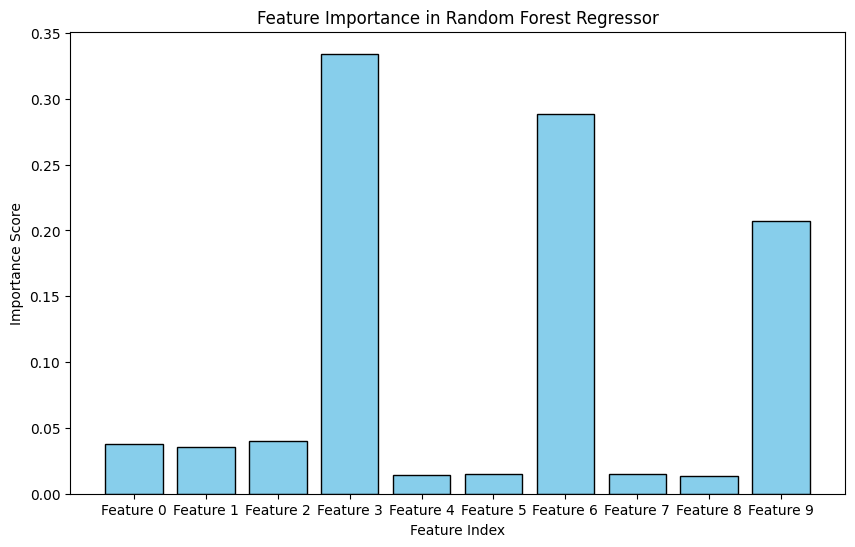

In [12]:
#Q.9
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Analyze feature importance
feature_importances = rf.feature_importances_

# Plot feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances, color='skyblue', edgecolor='k')
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest Regressor")
plt.xticks(range(X.shape[1]), labels=[f"Feature {i}" for i in range(X.shape[1])])
plt.show()



In [14]:
#Q.10 
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Classifier with Logistic Regression as base estimator
bagging_clf = BaggingClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print accuracy comparison
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Determine which model performed better
if rf_accuracy > bagging_accuracy:
    print("Random Forest performed better!")
elif rf_accuracy < bagging_accuracy:
    print("Bagging Classifier performed better!")
else:
    print("Both models performed equally well.")



Bagging Classifier Accuracy: 0.8550
Random Forest Accuracy: 0.9000
Random Forest performed better!


In [15]:
#Q.11 
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],      # Minimum number of samples to split
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples per leaf
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model on test data
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Hyperparameters: {accuracy:.4f}")



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Test Accuracy with Best Hyperparameters: 0.8850


n_estimators: 1, MSE: 22803.2287
n_estimators: 5, MSE: 9714.6228
n_estimators: 10, MSE: 7920.6668
n_estimators: 20, MSE: 7603.6291
n_estimators: 50, MSE: 7287.4131
n_estimators: 100, MSE: 7047.9580


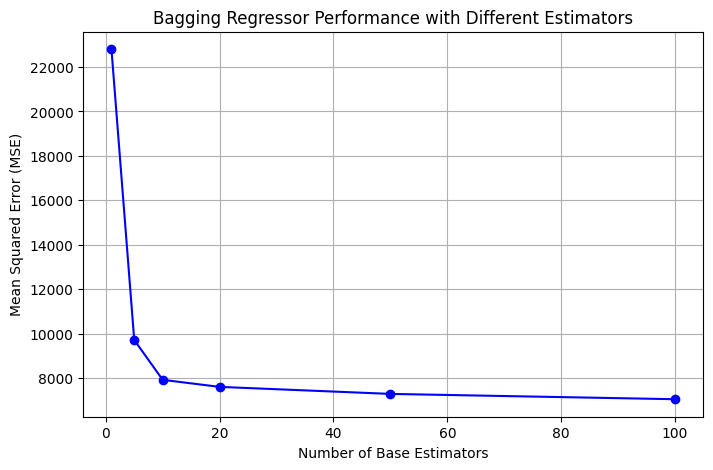

In [18]:
#Q.12 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of base estimators
n_estimators_list = [1, 5, 10, 20, 50, 100]

# Store MSE values
mse_scores = []

# Train Bagging Regressor with different numbers of base estimators
for n in n_estimators_list:
    bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), 
                                         n_estimators=n, 
                                         random_state=42)
    bagging_regressor.fit(X_train, y_train)
    y_pred = bagging_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"n_estimators: {n}, MSE: {mse:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, mse_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Base Estimators")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Bagging Regressor Performance with Different Estimators")
plt.grid(True)
plt.show()



In [19]:
#Q,13
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test data
y_pred = rf_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Identify misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]

# Display misclassified samples
print(f"Number of Misclassified Samples: {len(misclassified_indices)}")
misclassified_samples = pd.DataFrame(X_test[misclassified_indices], columns=[f"Feature {i}" for i in range(X.shape[1])])
misclassified_samples['True Label'] = y_test[misclassified_indices]
misclassified_samples['Predicted Label'] = y_pred[misclassified_indices]

# Show first few misclassified samples
print("Misclassified Samples:")
print(misclassified_samples.head())

# Visualizing the number of misclassified samples


Accuracy: 0.9000
Confusion Matrix:
[[88  5]
 [15 92]]
Number of Misclassified Samples: 20
Misclassified Samples:
   Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0   2.890643   0.838689  -0.817095   0.252231   0.939029  -0.812271   
1  -0.091845   0.010092  -0.942558  -0.736770  -0.322028   0.612722   
2   0.460825   0.308706  -1.399682  -0.290454  -1.163043  -0.184855   
3   2.212531  -0.216794   0.212740  -0.825654  -0.431126   0.925421   
4   0.415837  -0.158459   0.504288   0.013450  -0.507009   0.850248   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 12  Feature 13  \
0   0.188670  -0.715338  -0.367863  -0.003358  ...    1.486159    1.548918   
1   1.614779   0.585904   0.548320  -0.844941  ...    0.218534   -1.415267   
2  -0.249370   1.462255  -0.081067   0.284755  ...    1.428760    1.072542   
3   0.782874   0.444774  -0.728077  -2.086478  ...    0.364140    0.149363   
4   0.290965   1.784775   0.957932  -1.073328  ...   -0.928792   -0.22

Decision Tree Accuracy: 0.8750
Bagging Classifier Accuracy: 0.8850


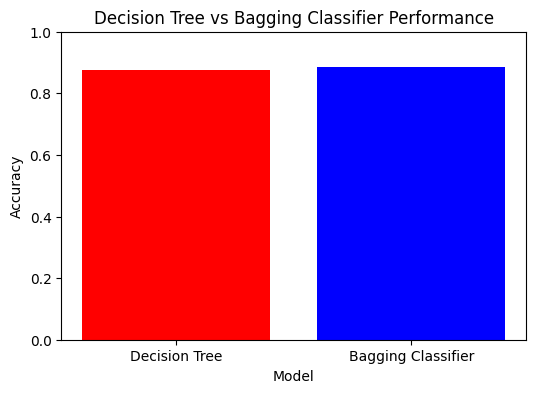

In [21]:
#Q.14
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Train a Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

# Print accuracy scores
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")

# Visualizing accuracy comparison
models = ["Decision Tree", "Bagging Classifier"]
accuracies = [dt_accuracy, bagging_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['red', 'blue'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Decision Tree vs Bagging Classifier Performance")
plt.ylim(0, 1)
plt.show()


Accuracy: 0.9000


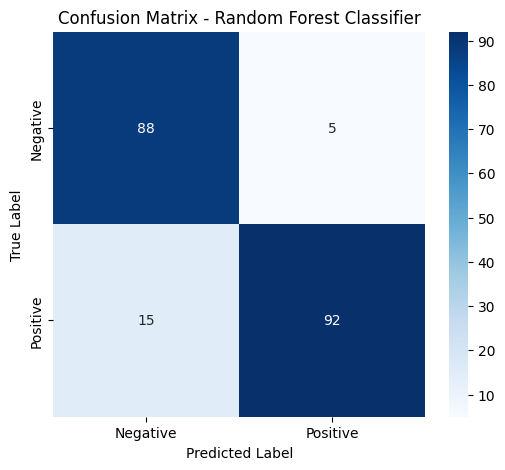

In [22]:
#Q.15 import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test data
y_pred = rf_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


Decision Tree Accuracy: 0.8750
SVM Accuracy: 0.8450
Stacking Classifier Accuracy: 0.8800


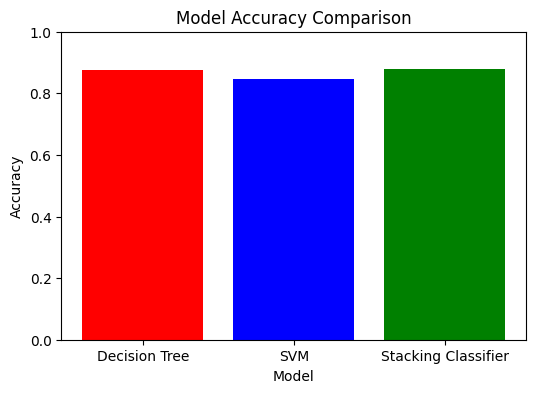

In [24]:
#Q.16 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Define the Stacking Classifier with Logistic Regression as the meta-learner
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(), cv=5)

# Train base models and the stacking classifier
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Stacking Classifier": stacking_clf
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(6, 4))
plt.bar(accuracies.keys(), accuracies.values(), color=['red', 'blue', 'green'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()


Top 5 Most Important Features:
       Feature  Importance
5    Feature 5    0.363134
18  Feature 18    0.177252
1    Feature 1    0.101820
14  Feature 14    0.075575
11  Feature 11    0.025690


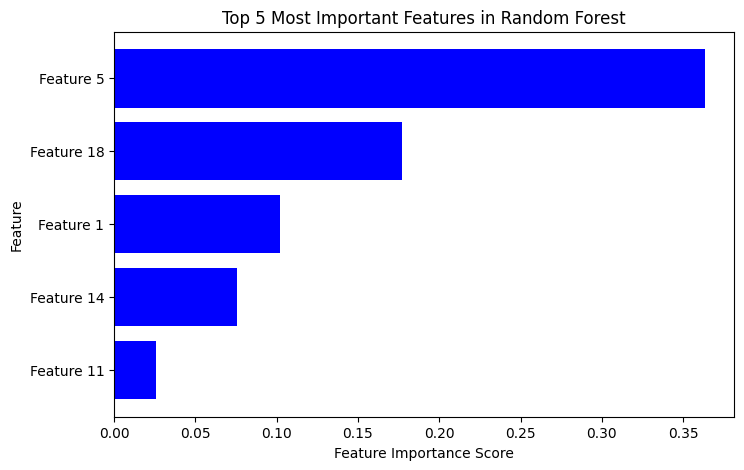

In [25]:
#Q.17 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_clf.feature_importances_

# Create a DataFrame to store feature importance
feature_df = pd.DataFrame({'Feature': [f'Feature {i}' for i in range(X.shape[1])],
                           'Importance': feature_importances})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print top 5 most important features
print("Top 5 Most Important Features:")
print(feature_df.head())

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_df['Feature'][:5], feature_df['Importance'][:5], color='blue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 5 Most Important Features in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        93
           1       0.95      0.83      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



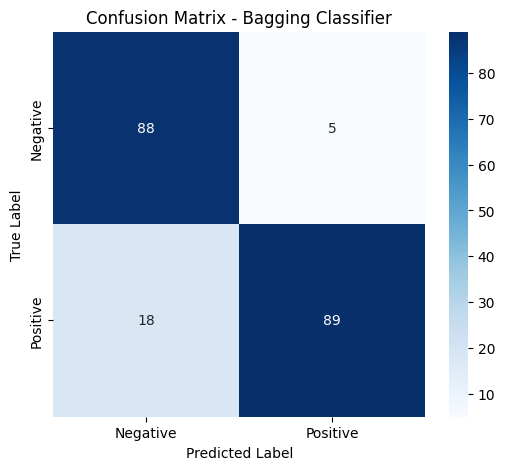

In [27]:
#Q.18
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict on test data
y_pred = bagging_clf.predict(X_test)

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()


Max Depth: None, Accuracy: 0.9000
Max Depth: 5, Accuracy: 0.8800
Max Depth: 10, Accuracy: 0.8850
Max Depth: 15, Accuracy: 0.8950
Max Depth: 20, Accuracy: 0.9000
Max Depth: 30, Accuracy: 0.9000
Max Depth: 50, Accuracy: 0.9000


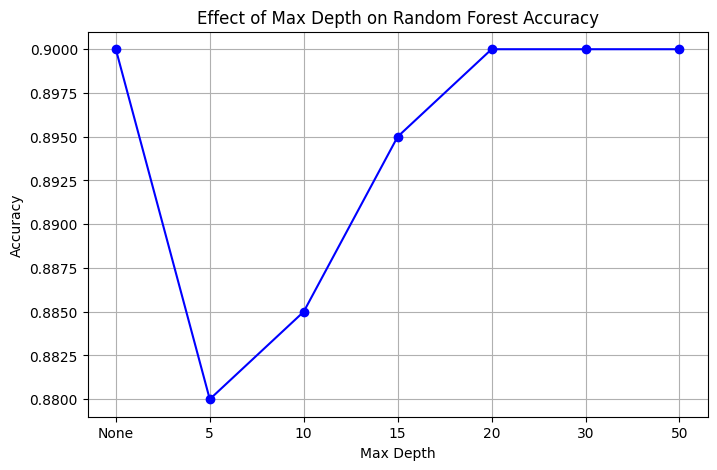

In [28]:
#Q.19 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different values for max_depth
max_depth_values = [None, 5, 10, 15, 20, 30, 50]

# Store accuracy results
accuracy_scores = []

# Train Random Forest with different max_depth values
for max_depth in max_depth_values:
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot([str(md) for md in max_depth_values], accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Max Depth on Random Forest Accuracy")
plt.grid(True)
plt.show()



Decision Tree Bagging Regressor Performance:
Mean Absolute Error (MAE): 68.6788
Mean Squared Error (MSE): 7287.4131
R2 Score: 0.8117

K-Neighbors Bagging Regressor Performance:
Mean Absolute Error (MAE): 97.5215
Mean Squared Error (MSE): 14362.1458
R2 Score: 0.6290


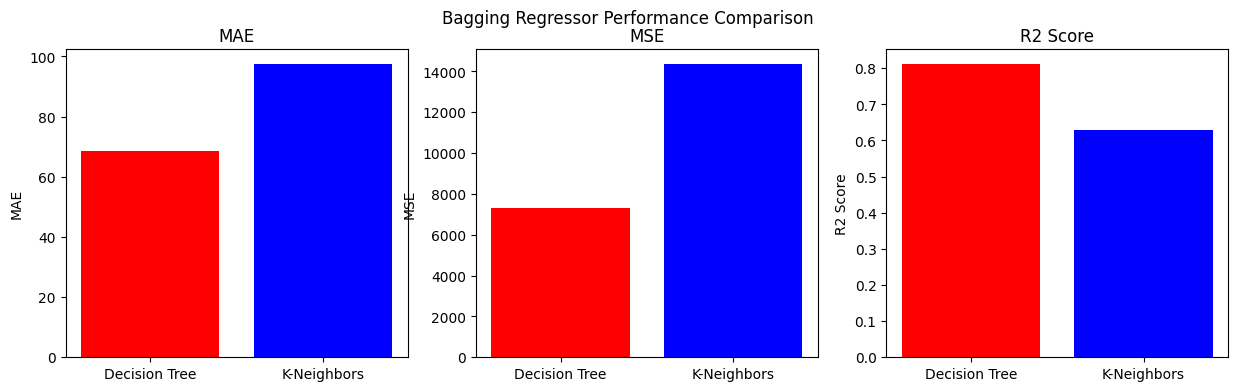

In [31]:
#Q.20 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = {
    "Decision Tree": DecisionTreeRegressor(),
    "K-Neighbors": KNeighborsRegressor()
}

# Store performance metrics
results = {}

# Train Bagging Regressor with different base estimators
for name, estimator in base_estimators.items():
    bagging_regressor = BaggingRegressor(estimator=estimator, n_estimators=50, random_state=42)
    bagging_regressor.fit(X_train, y_train)
    y_pred = bagging_regressor.predict(X_test)

    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}
    print(f"\n{name} Bagging Regressor Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")

# Visualize performance comparison
metrics = ["MAE", "MSE", "R2 Score"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in base_estimators.keys()]
    axes[i].bar(base_estimators.keys(), values, color=['red', 'blue'])
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)

plt.suptitle("Bagging Regressor Performance Comparison")
plt.show()


ROC-AUC Score: 0.9379


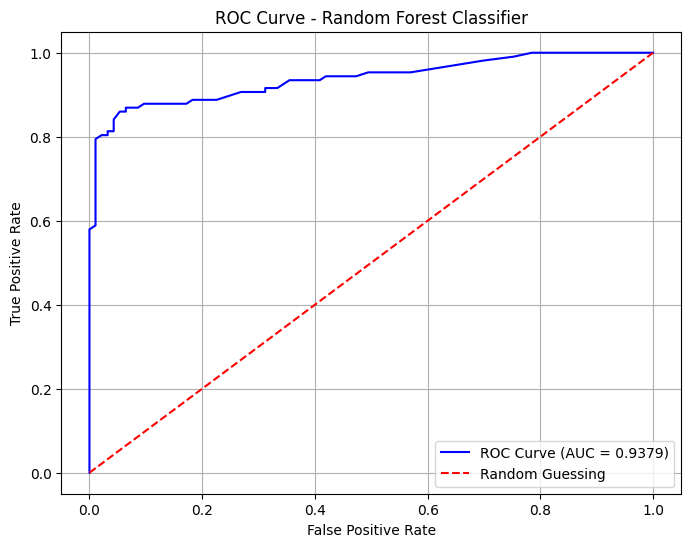

In [33]:
#Q.21 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import make_classification

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42,)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict probability scores for the positive class
y_probs = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend()
plt.grid()
plt.show()


In [35]:
#Q.22 
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Define a Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Accuracy Scores: [0.94  0.905 0.9   0.92  0.885]
Mean Accuracy: 0.9100
Standard Deviation: 0.0187


Average Precision Score: 0.9577


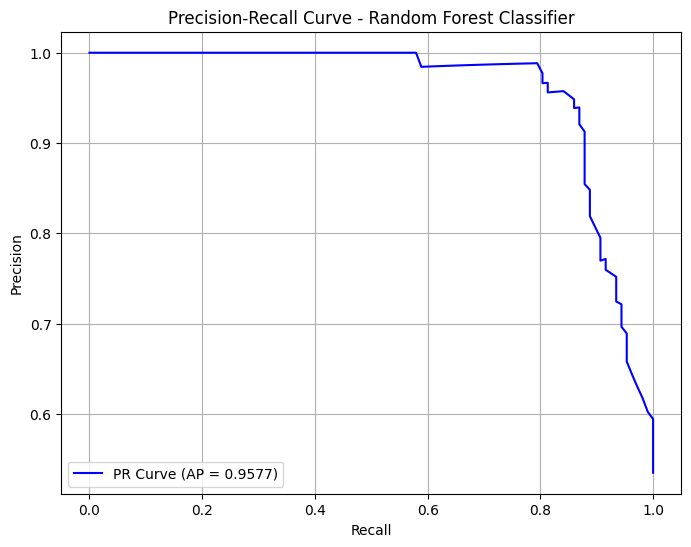

In [36]:
#Q>23 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import make_classification

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict probability scores for the positive class
y_probs = rf_clf.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Compute Average Precision Score
average_precision = average_precision_score(y_test, y_probs)
print(f"Average Precision Score: {average_precision:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f"PR Curve (AP = {average_precision:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest Classifier")
plt.legend()
plt.grid()
plt.show()


In [40]:
#Q.24
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define the meta-model (final estimator)
meta_model = LogisticRegression()

# Create the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Evaluate Stacking Classifier
y_pred_stack = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stack)

# Train individual Random Forest Classifier for comparison
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate Random Forest Classifier
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print results
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Compare using cross-validation
cv_scores_stack = cross_val_score(stacking_clf, X, y, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')

print(f"Stacking Classifier Mean CV Accuracy: {cv_scores_stack.mean():.4f}")
print(f"Random Forest Mean CV Accuracy: {cv_scores_rf.mean():.4f}")




Stacking Classifier Accuracy: 0.9000
Random Forest Accuracy: 0.9000
Stacking Classifier Mean CV Accuracy: 0.8950
Random Forest Mean CV Accuracy: 0.8980



Bootstrap Sample Size: 0.5
Mean Absolute Error (MAE): 68.4704
Mean Squared Error (MSE): 7552.1767
R2 Score: 0.8049

Bootstrap Sample Size: 0.7
Mean Absolute Error (MAE): 66.7584
Mean Squared Error (MSE): 7323.0326
R2 Score: 0.8108

Bootstrap Sample Size: 0.9
Mean Absolute Error (MAE): 66.2755
Mean Squared Error (MSE): 6945.2309
R2 Score: 0.8206

Bootstrap Sample Size: 1.0
Mean Absolute Error (MAE): 68.6788
Mean Squared Error (MSE): 7287.4131
R2 Score: 0.8117


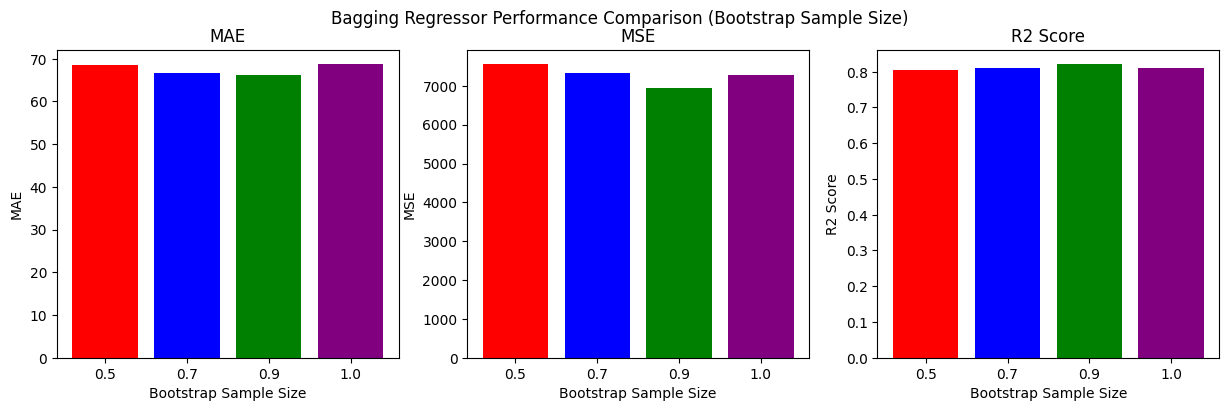

In [41]:
#Q.25
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different bootstrap sample sizes (fractions of training data)
bootstrap_sizes = [0.5, 0.7, 0.9, 1.0]

# Store performance metrics
results = {}

# Train Bagging Regressor with different bootstrap sizes
for bootstrap_size in bootstrap_sizes:
    bagging_regressor = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=bootstrap_size,
        random_state=42
    )
    
    bagging_regressor.fit(X_train, y_train)
    y_pred = bagging_regressor.predict(X_test)

    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[bootstrap_size] = {"MAE": mae, "MSE": mse, "R2 Score": r2}
    print(f"\nBootstrap Sample Size: {bootstrap_size}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")

# Visualize performance comparison
metrics = ["MAE", "MSE", "R2 Score"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, metric in enumerate(metrics):
    values = [results[size][metric] for size in bootstrap_sizes]
    axes[i].bar([str(size) for size in bootstrap_sizes], values, color=['red', 'blue', 'green', 'purple'])
    axes[i].set_title(metric)
    axes[i].set_xlabel("Bootstrap Sample Size")
    axes[i].set_ylabel(metric)

plt.suptitle("Bagging Regressor Performance Comparison (Bootstrap Sample Size)")
plt.show()


**THANKYOU**